In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Extraction


In [2]:
df_energy=pd.read_csv('D:\\energy.csv')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19696\3253996197.py:1: DtypeWarning: Columns (4,10,12,14,15,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_energy=pd.read_csv('D:\\energy.csv')


In [3]:
df_energy.head()

,Order,Property Name,Parent Property Id,Parent Property Name,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,...,District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),DOF Benchmarking Submission Status
0,1,The Argonaut Building,NaN,NaN,Not found,Not found,Manhattan,Office,"Bank Branch, Office",Office,...,1133475.1,1435754.7,16672.2,6551394.1,1920103.6,732.4,76.3,656.1,3635.5,Not found
1,3,Cathedral Preparatory Seminary,NaN,NaN,Not found,Not found,Queens,K-12 School,K-12 School,K-12 School,...,NaN,2068300.1,23243.7,616343.7,184131.9,164.5,109.9,54.6,102.9,Not found
2,4,The Nomad Hotel,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,8245445.1,86776.9,8033914.4,2354605.3,1150.2,438.0,712.3,10762.6,Not found
3,5,10 West 27 Street Corp,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,1848519.4,20520.9,1976691.9,582516.1,273.4,98.2,175.3,790.1,Not found
4,6,Westbury Realty,NaN,NaN,Not found,Not found,Manhattan,Hotel,Hotel,Hotel,...,NaN,NaN,NaN,1022951.6,299809.9,90.7,0.0,90.7,143.0,Not found


In [4]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59324 entries, 0 to 59323
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       59324 non-null  int64  
 1   Property Name                                               57632 non-null  object 
 2   Parent Property Id                                          25000 non-null  object 
 3   Parent Property Name                                        25000 non-null  object 
 4   Street Number                                               56357 non-null  object 
 5   Street Name                                                 59202 non-null  object 
 6   Borough                                                     59206 non-null  object 
 7   Primary Property Type - Self Selected                       58079 non-null  object 
 

In [5]:
df_energy.isnull().sum()

Order                                                             0
Property Name                                                  1692
Parent Property Id                                            34324
Parent Property Name                                          34324
Street Number                                                  2967
Street Name                                                     122
Borough                                                         118
Primary Property Type - Self Selected                          1245
List of All Property Use Types at Property                     1258
Largest Property Use Type                                      1277
Largest Property Use Type - Gross Floor Area (ft²)             1728
2nd Largest Property Use Type                                 28374
2nd Largest Property Use - Gross Floor Area (ft²)             28374
3rd Largest Property Use Type                                 33150
3rd Largest Property Use Type - Gross Floor Area

In [6]:
df_energy.columns

Index(['Order', 'Property Name', 'Parent Property Id', 'Parent Property Name',
       'Street Number', 'Street Name', 'Borough',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Occupancy', 'Metered Areas (Energy)', 'Metered Areas  (Water)',
       'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)',
       'Fuel

In [7]:
df_energy.describe()

,Order,Occupancy
count,59324.000000,57632.000000
mean,12947.043659,98.587330
std,9582.439399,8.280653
min,1.000000,0.000000
25%,5188.000000,100.000000
50%,10646.000000,100.000000
75%,19736.250000,100.000000
max,34686.000000,100.000000


# Data Acquisition and filtering

In [8]:
#Removing noise from the dataset and saving the filtered dataset
df_filtered=df_energy.drop(columns=['Order','Property Name','Parent Property Id','Parent Property Name','Street Number','Street Name','DOF Benchmarking Submission Status'],inplace=False)
file_path = "filtered_energy.csv"
df_filtered.to_csv(file_path, index=False)


# Data Aggregation and Representation

### Adding multiple columns to create new column


In [9]:
df_cleansed=df_filtered.copy()
# Convert columns to numeric and fill null and non-numeric values with 0
df_cleansed['Largest Property Use Type - Gross Floor Area (ft²)'] = pd.to_numeric(df_cleansed['Largest Property Use Type - Gross Floor Area (ft²)'], errors='coerce').fillna(0)
df_cleansed['2nd Largest Property Use - Gross Floor Area (ft²)'] = pd.to_numeric(df_cleansed['2nd Largest Property Use - Gross Floor Area (ft²)'], errors='coerce').fillna(0)
df_cleansed['3rd Largest Property Use Type - Gross Floor Area (ft²)'] = pd.to_numeric(df_cleansed['3rd Largest Property Use Type - Gross Floor Area (ft²)'], errors='coerce').fillna(0)

# Calculate the 'Total Gross Floor Area' by summing the columns and assign the result to a new column
df_cleansed['Total Gross Floor Area'] = df_cleansed['Largest Property Use Type - Gross Floor Area (ft²)'] + df_cleansed['2nd Largest Property Use - Gross Floor Area (ft²)'] + df_cleansed['3rd Largest Property Use Type - Gross Floor Area (ft²)']

# Create the new column 'Total Property Types In Use'
df_cleansed['Total Property Types In Use'] = df_cleansed[['3rd Largest Property Use Type', '2nd Largest Property Use Type', 'Largest Property Use Type']].apply(lambda x: ','.join(filter(lambda p: p not in ['Not Available', 'nan'], x.dropna().astype(str))), axis=1)


In [10]:
# Convert fuel columns to numeric type and replace non-numeric values with NaN
df_cleansed['Fuel Oil #1 Use (kBtu)'] = pd.to_numeric(df_cleansed['Fuel Oil #1 Use (kBtu)'], errors='coerce')
df_cleansed['Fuel Oil #2 Use (kBtu)'] = pd.to_numeric(df_cleansed['Fuel Oil #2 Use (kBtu)'], errors='coerce')
df_cleansed['Fuel Oil #4 Use (kBtu)'] = pd.to_numeric(df_cleansed['Fuel Oil #4 Use (kBtu)'], errors='coerce')
df_cleansed['Fuel Oil #5 & 6 Use (kBtu)'] = pd.to_numeric(df_cleansed['Fuel Oil #5 & 6 Use (kBtu)'], errors='coerce')
df_cleansed['Diesel #2 Use (kBtu)'] = pd.to_numeric(df_cleansed['Diesel #2 Use (kBtu)'], errors='coerce')

# Replace NaN values with 0 in fuel columns
df_cleansed['Fuel Oil #1 Use (kBtu)'].fillna(0, inplace=True)
df_cleansed['Fuel Oil #2 Use (kBtu)'].fillna(0, inplace=True)
df_cleansed['Fuel Oil #4 Use (kBtu)'].fillna(0, inplace=True)
df_cleansed['Fuel Oil #5 & 6 Use (kBtu)'].fillna(0, inplace=True)
df_cleansed['Diesel #2 Use (kBtu)'].fillna(0, inplace=True)

# Create a new column 'Total Fuel Consumption' by summing the fuel columns
df_cleansed['Total Fuel Consumption'] = df_cleansed['Fuel Oil #1 Use (kBtu)'] + df_cleansed['Fuel Oil #2 Use (kBtu)'] + df_cleansed['Fuel Oil #4 Use (kBtu)'] + df_cleansed['Fuel Oil #5 & 6 Use (kBtu)'] + df_cleansed['Diesel #2 Use (kBtu)']


# Data Validation and Cleansing

In [11]:
df_cleansed.isnull().sum()

Borough                                                         118
Primary Property Type - Self Selected                          1245
List of All Property Use Types at Property                     1258
Largest Property Use Type                                      1277
Largest Property Use Type - Gross Floor Area (ft²)                0
2nd Largest Property Use Type                                 28374
2nd Largest Property Use - Gross Floor Area (ft²)                 0
3rd Largest Property Use Type                                 33150
3rd Largest Property Use Type - Gross Floor Area (ft²)            0
Year Built                                                     1245
Occupancy                                                      1692
Metered Areas (Energy)                                         3890
Metered Areas  (Water)                                        21054
ENERGY STAR Score                                             12589
Source EUI (kBtu/ft²)                           

### Removing null values of numeric columns

In [12]:
# Interpolate 0 values in 'Total Gross Floor Area' column
df_cleansed['Total Gross Floor Area'] = df_cleansed['Total Gross Floor Area'].replace(0, np.nan)  # Replace 0 values with NaN
df_cleansed['Total Gross Floor Area'].interpolate(method='linear', inplace=True)  # Interpolate missing values using linear method


In [13]:
# Columns to check for missing values
columns_to_check = ['ENERGY STAR Score', 'Source EUI (kBtu/ft²)',
                    'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
                    'Electricity Use - Grid Purchase (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)',
                    'Water Use (All Water Sources) (kgal)','Occupancy']

for column in columns_to_check:
    null_count = df_cleansed[column].isnull().sum()
    non_numeric_count = pd.to_numeric(df_cleansed[column], errors='coerce').isnull().sum()
    print(f"Column: {column}")
    print(f"Null values: {null_count}")
    print(f"Non-numeric values: {non_numeric_count}")
    
    # Impute null and non-numeric values using interpolate
    if null_count > 0 or non_numeric_count > 0:
        df_cleansed[column] = pd.to_numeric(df_cleansed[column], errors='coerce')  # Convert column to numeric type
        df_cleansed[column].interpolate(method='linear', inplace=True)  # Impute using interpolate method

        # Check if any null or non-numeric values remaining after interpolation
        null_count_after = df_cleansed[column].isnull().sum()
        non_numeric_count_after = pd.to_numeric(df_cleansed[column], errors='coerce').isnull().sum()
        print(f"Null values after interpolation: {null_count_after}")
        print(f"Non-numeric values after interpolation: {non_numeric_count_after}")

Column: ENERGY STAR Score
Null values: 12589
Non-numeric values: 14693
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: Source EUI (kBtu/ft²)
Null values: 4251
Non-numeric values: 4414
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: District Steam Use (kBtu)
Null values: 34032
Non-numeric values: 55888
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: Natural Gas Use (kBtu)
Null values: 8672
Non-numeric values: 10114
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: Electricity Use - Grid Purchase (kBtu)
Null values: 4577
Non-numeric values: 4821
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: Total GHG Emissions (Metric Tons CO2e)
Null values: 3143
Non-numeric values: 3217
Null values after interpolation: 0
Non-numeric values after interpolation: 0
Column: Water Use (All Water Sources) (kgal)
Null values: 22

### Removing null values of non-numeric columns

In [14]:
df_cleansed.dropna(subset=['Borough'], inplace=True)

In [15]:
df_cleansed['Year Built'] = pd.to_numeric(df_cleansed['Year Built'], errors='coerce')
mode_value = df_cleansed['Year Built'].mode()[0]
df_cleansed['Year Built'].fillna(mode_value, inplace=True)


In [16]:
columns_to_impute_mode = ['Metered Areas  (Water)', 'Metered Areas (Energy)']

# Impute missing values with mode
for column in columns_to_impute_mode:
    mode_value = df_cleansed[column].mode()[0]
    df_cleansed[column].fillna(mode_value, inplace=True)

# Check if any null values remaining after imputation
null_counts_after = df_cleansed[columns_to_impute_mode].isnull().sum()
null_counts_after

Metered Areas  (Water)    0
Metered Areas (Energy)    0
dtype: int64

### Filtering out necessary columns

In [17]:
# Specify the columns you want to filter
columns_to_filter = ['Borough',  'Year Built','Metered Areas  (Water)', 'Metered Areas (Energy)', 'Total Property Types In Use','ENERGY STAR Score', 'Source EUI (kBtu/ft²)',
                    'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
                    'Electricity Use - Grid Purchase (kBtu)', 'Total GHG Emissions (Metric Tons CO2e)',
                    'Water Use (All Water Sources) (kgal)','Occupancy','Total Gross Floor Area','Total Fuel Consumption']

# Filter the DataFrame using the specified columns
df_cleansed = df_cleansed[columns_to_filter]

df_cleansed.head()

,Borough,Year Built,Metered Areas (Water),Metered Areas (Energy),Total Property Types In Use,ENERGY STAR Score,Source EUI (kBtu/ft²),District Steam Use (kBtu),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Occupancy,Total Gross Floor Area,Total Fuel Consumption
0,Manhattan,1909.0,Whole Building,Whole Building,"Bank Branch,Office",90.0,138.4,1133475.10,1.435755e+06,6551394.1,732.4,3635.5,95.0,169416.0,0.0
1,Queens,1963.0,Whole Building,Whole Building,K-12 School,100.0,43.5,2143857.95,2.068300e+06,616343.7,164.5,102.9,100.0,94380.0,0.0
2,Manhattan,1999.0,Whole Building,Whole Building,Hotel,83.0,271.1,3154240.80,8.245445e+06,8033914.4,1150.2,10762.6,85.0,125000.0,0.0
3,Manhattan,1994.0,Whole Building,Whole Building,Hotel,27.0,163.0,4164623.65,1.848519e+06,1976691.9,273.4,790.1,100.0,50000.0,0.0
4,Manhattan,2012.0,Whole Building,Whole Building,Hotel,99.0,64.2,5175006.50,1.866393e+06,1022951.6,90.7,143.0,0.0,50000.0,0.0


### Encoding non-numeric columns

In [18]:
df_cleansed.nunique()

Borough                                      18
Year Built                                  180
Metered Areas  (Water)                       10
Metered Areas (Energy)                       35
Total Property Types In Use                1016
ENERGY STAR Score                          2729
Source EUI (kBtu/ft²)                      6935
District Steam Use (kBtu)                 56593
Natural Gas Use (kBtu)                    47896
Electricity Use - Grid Purchase (kBtu)    47613
Total GHG Emissions (Metric Tons CO2e)    18079
Water Use (All Water Sources) (kgal)      45316
Occupancy                                    30
Total Gross Floor Area                    19208
Total Fuel Consumption                    11945
dtype: int64

In [19]:
df_cleansed['Total Property Types In Use'].value_counts()

Multifamily Housing                                                   31151
Office                                                                 2825
K-12 School                                                            1843
Parking,Multifamily Housing                                            1817
Retail Store,Multifamily Housing                                       1630
                                                                      ...  
Personal Services (Health/Beauty, Dry Cleaning, etc.),Retail Store        1
Bank Branch,Other - Restaurant/Bar,Office                                 1
Retail Store,Medical Office,Parking                                       1
Bank Branch,Outpatient Rehabilitation/Physical Therapy,Office             1
Other,Distribution Center                                                 1
Name: Total Property Types In Use, Length: 1016, dtype: int64

In [20]:
# Combine the strings and sort them alphabetically
df_cleansed['Total Property Types In Use'] = df_cleansed['Total Property Types In Use'].str.split(',').apply(lambda x: ','.join(sorted(x)))



In [21]:
df_cleansed['Total Property Types In Use'].value_counts()

Multifamily Housing                                           31151
Office                                                         2825
K-12 School                                                    1843
Multifamily Housing,Parking                                    1820
Multifamily Housing,Retail Store                               1639
                                                              ...  
Office,Other,Pre-school/Daycare                                   1
Financial Office,Office,Worship Facility                          1
Multifamily Housing,Other - Lodging/Residential                   1
Food Service,Multifamily Housing,Parking                          1
Multifamily Housing,Other - Mall,Supermarket/Grocery Store        1
Name: Total Property Types In Use, Length: 782, dtype: int64

In [22]:
# Get the frequency ranks of the column
frequency_ranks = df_cleansed['Total Property Types In Use'].rank(ascending=False, method='min')

# Assign the frequency ranks to a new column
df_cleansed['Encoded Property Types'] = frequency_ranks
df_cleansed['Encoded Property Types'].head(10)

0    57444.0
1    52050.0
2    54145.0
3    54145.0
4    54145.0
5     6265.0
6    54095.0
7     3898.0
8    56054.0
9     9933.0
Name: Encoded Property Types, dtype: float64

In [23]:
df_cleansed['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                                                                   58231
See Primary BBL                                                                                                                                    447
Another configuration                                                                                                                              274
Not Available                                                                                                                                       94
Common areas only                                                                                                                                   63
Common areas (all energy loads)                                                                                                                     50
Tenant areas only                                                                             

In [24]:
# Define the frequency encoding dictionary
frequency_dict = df_cleansed['Metered Areas (Energy)'].value_counts().to_dict()

# Create a new column 'Metered Areas (Energy)_encoded' with the encoded valuess
df_cleansed['Metered Areas (Energy)'] = df_cleansed['Metered Areas (Energy)'].map(frequency_dict)

# Print the encoded column
print(df_cleansed['Metered Areas (Energy)'])

0        58231
1        58231
2        58231
3        58231
4        58231
         ...  
59319    58231
59320    58231
59321    58231
59322    58231
59323    58231
Name: Metered Areas (Energy), Length: 59206, dtype: int64


In [25]:
df_cleansed['Metered Areas  (Water)'].value_counts()

Whole Building                                       49630
Not Available                                         9035
See Primary BBL                                        447
Tenant and/or common areas (partial energy loads)       24
Another configuration                                   18
Combination of common and tenant areas                  18
Common areas (all energy loads)                         14
Common areas only                                       13
Tenant areas (all energy loads)                          4
Tenant areas only                                        3
Name: Metered Areas  (Water), dtype: int64

In [26]:
# Define the frequency encoding dictionary
frequency_dict = df_cleansed['Metered Areas  (Water)'].value_counts().to_dict()

# Create a new column 'Metered Areas (Energy)_encoded' with the encoded values
df_cleansed['Metered Areas  (Water)'] = df_cleansed['Metered Areas  (Water)'].map(frequency_dict)

# Print the encoded column
print(df_cleansed['Metered Areas  (Water)'])

0        49630
1        49630
2        49630
3        49630
4        49630
         ...  
59319    49630
59320    49630
59321    49630
59322    49630
59323    49630
Name: Metered Areas  (Water), Length: 59206, dtype: int64


In [27]:
df_cleansed['Borough'].value_counts()

Manhattan        24136
Brooklyn         12865
Bronx            10813
Queens            9821
Staten Island     1015
Not Available      423
Manhattan           41
Brooklyn            32
brooklyn            26
BROOKLYN            15
bronx                8
QUEENS               3
BRONX                2
staten Island        2
STATEN ISLAND        1
Pine Hill            1
Patchogue            1
staten island        1
Name: Borough, dtype: int64

In [28]:
# Define the frequency encoding mapping
freq_encoding = df_cleansed['Borough'].value_counts(normalize=True).to_dict()

# Apply frequency encoding to the "Borough" column
df_cleansed['Borough'] = df_cleansed['Borough'].map(freq_encoding)

In [29]:
df_filtered['Year Built'] = df_filtered['Year Built'].astype(str)


In [30]:
df_cleansed.head()

,Borough,Year Built,Metered Areas (Water),Metered Areas (Energy),Total Property Types In Use,ENERGY STAR Score,Source EUI (kBtu/ft²),District Steam Use (kBtu),Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Total GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Occupancy,Total Gross Floor Area,Total Fuel Consumption,Encoded Property Types
0,0.407661,1909.0,49630,58231,"Bank Branch,Office",90.0,138.4,1133475.10,1.435755e+06,6551394.1,732.4,3635.5,95.0,169416.0,0.0,57444.0
1,0.165878,1963.0,49630,58231,K-12 School,100.0,43.5,2143857.95,2.068300e+06,616343.7,164.5,102.9,100.0,94380.0,0.0,52050.0
2,0.407661,1999.0,49630,58231,Hotel,83.0,271.1,3154240.80,8.245445e+06,8033914.4,1150.2,10762.6,85.0,125000.0,0.0,54145.0
3,0.407661,1994.0,49630,58231,Hotel,27.0,163.0,4164623.65,1.848519e+06,1976691.9,273.4,790.1,100.0,50000.0,0.0,54145.0
4,0.407661,2012.0,49630,58231,Hotel,99.0,64.2,5175006.50,1.866393e+06,1022951.6,90.7,143.0,0.0,50000.0,0.0,54145.0


In [31]:
df_cleansed.dtypes

Borough                                   float64
Year Built                                float64
Metered Areas  (Water)                      int64
Metered Areas (Energy)                      int64
Total Property Types In Use                object
ENERGY STAR Score                         float64
Source EUI (kBtu/ft²)                     float64
District Steam Use (kBtu)                 float64
Natural Gas Use (kBtu)                    float64
Electricity Use - Grid Purchase (kBtu)    float64
Total GHG Emissions (Metric Tons CO2e)    float64
Water Use (All Water Sources) (kgal)      float64
Occupancy                                 float64
Total Gross Floor Area                    float64
Total Fuel Consumption                    float64
Encoded Property Types                    float64
dtype: object

In [32]:
df_cleansed.columns

Index(['Borough', 'Year Built', 'Metered Areas  (Water)',
       'Metered Areas (Energy)', 'Total Property Types In Use',
       'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)', 'Occupancy',
       'Total Gross Floor Area', 'Total Fuel Consumption',
       'Encoded Property Types'],
      dtype='object')

In [33]:
df_cleansed = df_cleansed.drop('Total Property Types In Use', axis=1)

# Data Analysis

### Dimension Reduction using PCA

In [34]:
df_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59206 entries, 0 to 59323
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Borough                                 59206 non-null  float64
 1   Year Built                              59206 non-null  float64
 2   Metered Areas  (Water)                  59206 non-null  int64  
 3   Metered Areas (Energy)                  59206 non-null  int64  
 4   ENERGY STAR Score                       59206 non-null  float64
 5   Source EUI (kBtu/ft²)                   59206 non-null  float64
 6   District Steam Use (kBtu)               59206 non-null  float64
 7   Natural Gas Use (kBtu)                  59206 non-null  float64
 8   Electricity Use - Grid Purchase (kBtu)  59206 non-null  float64
 9   Total GHG Emissions (Metric Tons CO2e)  59206 non-null  float64
 10  Water Use (All Water Sources) (kgal)    59206 non-null  fl

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Step 3: Perform PCA
scaler = StandardScaler()
#df_cleansed.drop(columns = ['Total Property Types In Use'],inplace = True)
scaled_data = scaler.fit_transform(df_cleansed)  # Standardize the data
pca = PCA(n_components=2)  # Specify the number of components
pca.fit(scaled_data)  # Fit the PCA model
transformed_data = pca.transform(scaled_data)  # Transform the data to the new feature space

In [36]:
# Perform PCA
pca = PCA()
pca.fit(df_cleansed)

# Extract the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a dataframe to store variable names and their corresponding explained variances
variance_df = pd.DataFrame({'Variable': df_cleansed.columns, 'Explained Variance': explained_variance})

# Sort the dataframe by explained variance in descending order
variance_df = variance_df.sort_values(by='Explained Variance')

# Print the ranked variables
print(variance_df)

                                  Variable  Explained Variance
14                  Encoded Property Types        2.077346e-25
13                  Total Fuel Consumption        1.083101e-21
12                  Total Gross Floor Area        1.525563e-20
11                               Occupancy        1.600472e-20
10    Water Use (All Water Sources) (kgal)        8.345724e-16
9   Total GHG Emissions (Metric Tons CO2e)        2.782902e-15
8   Electricity Use - Grid Purchase (kBtu)        3.499666e-15
7                   Natural Gas Use (kBtu)        4.100853e-15
6                District Steam Use (kBtu)        9.733057e-13
5                    Source EUI (kBtu/ft²)        1.027325e-12
4                        ENERGY STAR Score        9.605699e-11
3                   Metered Areas (Energy)        3.133339e-10
2                   Metered Areas  (Water)        5.100719e-08
1                               Year Built        5.223046e-04
0                                  Borough        9.994

In [37]:
N = 10  # Change this to the desired number of top features
top_features = variance_df.head(N)
print(top_features)

                                  Variable  Explained Variance
14                  Encoded Property Types        2.077346e-25
13                  Total Fuel Consumption        1.083101e-21
12                  Total Gross Floor Area        1.525563e-20
11                               Occupancy        1.600472e-20
10    Water Use (All Water Sources) (kgal)        8.345724e-16
9   Total GHG Emissions (Metric Tons CO2e)        2.782902e-15
8   Electricity Use - Grid Purchase (kBtu)        3.499666e-15
7                   Natural Gas Use (kBtu)        4.100853e-15
6                District Steam Use (kBtu)        9.733057e-13
5                    Source EUI (kBtu/ft²)        1.027325e-12


## Computing the correlation Matrix

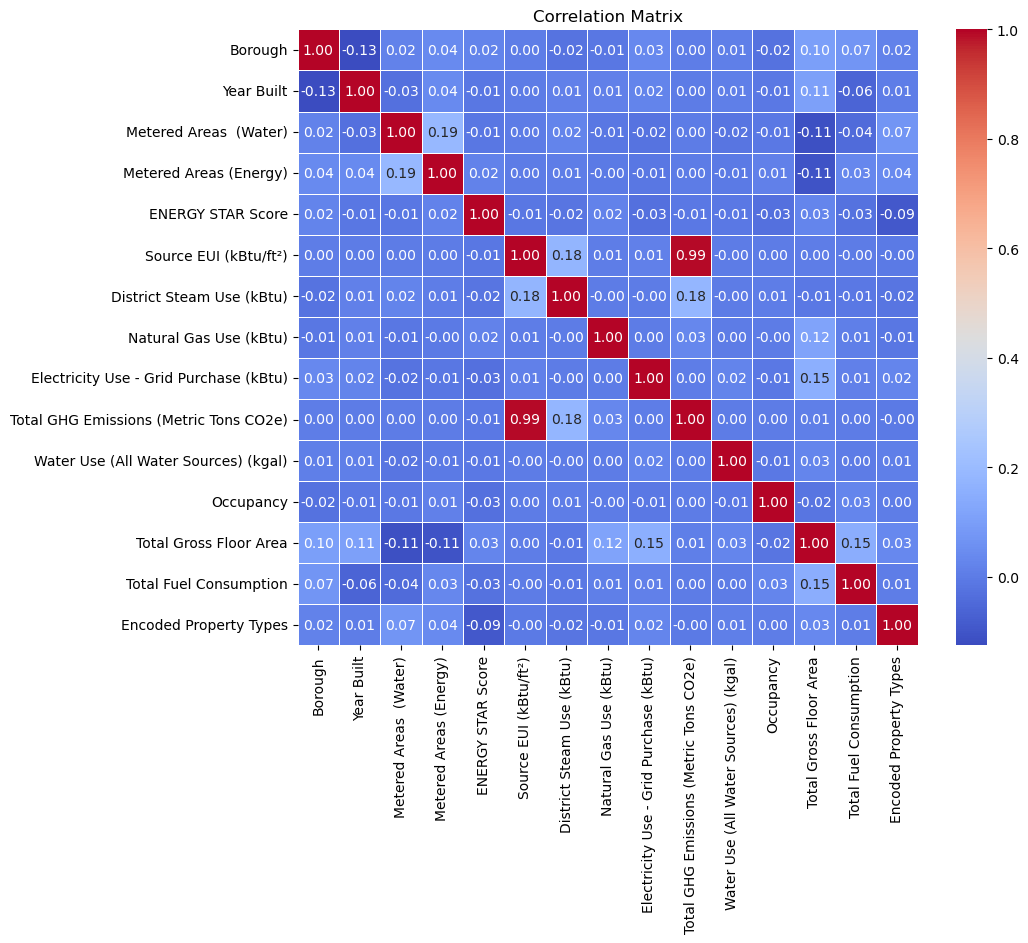

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df_cleansed.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Applying Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

##### Why Predicting 'Source EUI (kBtu/ft²)' column:
>The 'Source EUI (kBtu/ft²)' is a measure of energy use intensity, specifically the energy consumed per square foot of the building. By accurately predicting this column, we can gain insights into the energy efficiency of buildings. This information is valuable for identifying buildings with high energy consumption, which can then be targeted for energy-saving measures and improvements.

> Also energy consumption contributes to greenhouse gas emissions and resource depletion. Predicting the 'Source EUI (kBtu/ft²)' allows us to assess the environmental impact of buildings and identify opportunities for reducing energy consumption, improving sustainability, and mitigating climate change.

>This information can be used to implement energy-saving measures, optimize energy usage, and reduce operational costs.


In [56]:
#Now we will take top 11 variables for implementing model
# Define the input columns and target column
from sklearn.model_selection import train_test_split

input_columns = [ 'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)', 'Electricity Use - Grid Purchase (kBtu)', 
                 'Total GHG Emissions (Metric Tons CO2e)', 'Water Use (All Water Sources) (kgal)', 'Occupancy', 
                 'Total Gross Floor Area', 'Total Fuel Consumption', 'Encoded Property Types']
target_column = 'Source EUI (kBtu/ft²)'

### Using XG Boost

#### Reason for using XG boost :
><strong>High performance</strong>: XGBoost is designed to be highly efficient and can handle large datasets with a large number of features.

><strong>Regularization and control over overfitting</strong>: XGBoost provides various regularization techniques such as L1 and L2 regularization, which help prevent overfitting and improve generalization.

><strong>Feature importance</strong>: XGBoost provides a built-in feature importance mechanism that ranks the importance of each feature in the dataset.

><strong>Handling missing values</strong>: XGBoost can handle missing values in the dataset automatically.

#### How XG Boost Works:

>XGBoost (eXtreme Gradient Boosting) is an optimized and scalable machine learning algorithm that belongs to the gradient boosting family. It works by combining multiple weak predictive models, typically decision trees, to create a stronger ensemble model. Here's a brief overview of how XGBoost works:

><strong>Initialization</strong>: XGBoost starts with an initial model, which is usually a simple model like a decision tree with a single leaf node.

><strong>Iterative Training</strong>: XGBoost performs iterative training by sequentially adding new decision trees to the ensemble. Each new tree is trained to correct the mistakes made by the previous trees.

><strong>Gradient Calculation</strong>: At each iteration, XGBoost calculates the gradients of the loss function with respect to the predictions made by the ensemble. These gradients represent the direction and magnitude of the errors.

><strong>Tree Building</strong>: XGBoost builds decision trees to minimize the loss function. It uses a technique called gradient boosting, where each new tree is trained to fit the negative gradients of the loss function.

><strong>Tree Pruning</strong>: After each tree is built, XGBoost applies regularization techniques to control the complexity of the trees and prevent overfitting. This involves pruning the trees based on their importance and complexity.

><strong>Prediction</strong>: Once all the trees are trained and pruned, XGBoost makes predictions by combining the predictions of all the individual trees in the ensemble. The final prediction is a weighted sum of the predictions made by each tree.

><strong>Model Evaluation</strong>: XGBoost uses evaluation metrics such as mean squared error (MSE) or log loss to assess the performance of the ensemble model. This helps in determining the quality of the model and guiding further iterations if necessary.


In [46]:
pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import xgboost as xgb
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df_cleansed[input_columns], df_cleansed[target_column], test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = model.score(y_test, y_pred)
print("MSE : ",mse)
print("RMSE : ",rmse)
print("R^2 Score:",r2)

MSE :  4980197.466162765
RMSE :  2231.6356033552534
R^2 Score: 0.9231490688389066


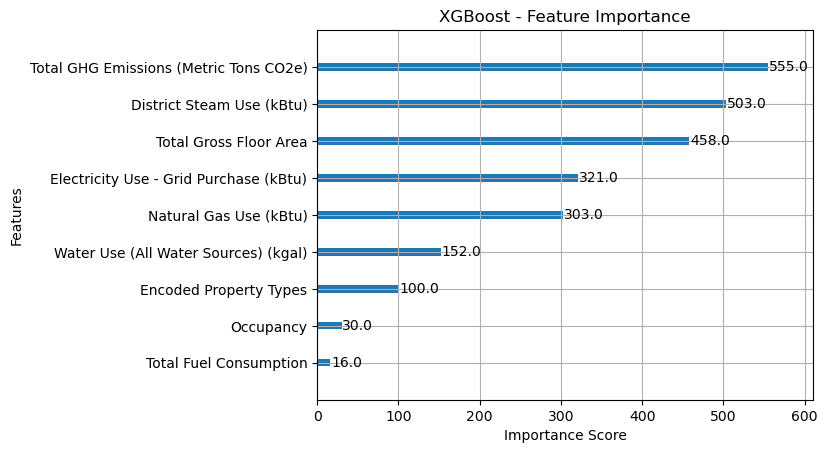

In [48]:
# Plotting feature importance
xgb.plot_importance(model)
plt.title("XGBoost - Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

#### R2 score is relatively higher when using XGBoost Regression

### Applying cross validation and then implementing xgBoost

In [52]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
scores = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
# Convert the negative MSE scores to positive
mse_scores = -scores
# Calculate the mean and standard deviation of MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
# Fit the model on the whole training data
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)
# Calculate the MSE on the test set
mse = mean_squared_error(y_test, y_pred)

# Print the mean and standard deviation of MSE scores from cross-validation
print("Mean MSE from Cross-Validation:", mean_mse)
print("Standard Deviation of MSE from Cross-Validation:", std_mse)

# Print the MSE on the test set
print("MSE on Test Set:", mse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean MSE from Cross-Validation: 17758484761.02439
Standard Deviation of MSE from Cross-Validation: 16487795923.44658
MSE on Test Set: 4980197.466162765
R2 Score: 0.9231490688389066


# Data Visualization

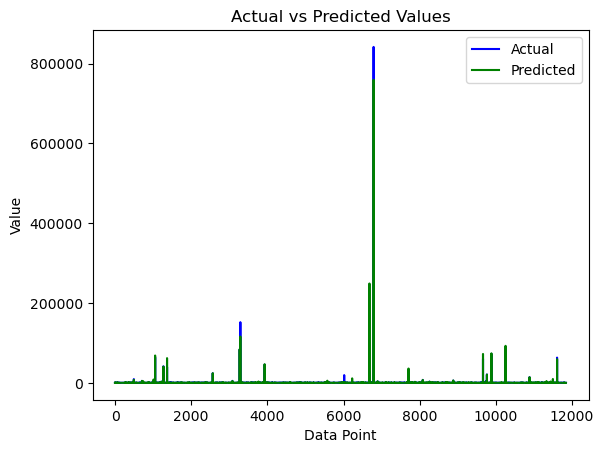

In [58]:
import matplotlib.pyplot as plt
# Create a scatter plot or line plot
plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_pred)), y_pred, color='green', label='Predicted')

# Add labels and title
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')

# Add legend
plt.legend()

# Show the plot
plt.show()


# Conclusion

><strong>Standard Deviation of MSE from Cross-Validation</strong>: The standard deviation of MSE from cross-validation is 16487795923.44658. This indicates the variability or spread of the MSE values across the cross-validation folds. A lower standard deviation suggests that the model's performance is consistent across different subsets of the data.

><strong>R2 Score</strong>: The R2 score is 0.9231490688389066. The R2 score measures the proportion of the variance in the target variable that is explained by the model. A higher R2 score indicates a better fit of the model to the data. In this case, the R2 score of 0.92 suggests that the model explains 92.31% of the variance in the target variable.

><strong>Summary:</strong>Overall, the results indicate that the model performs well with low MSE values and a high R2 score. This suggests that the model is able to make accurate predictions and explain a significant portion of the variance in the target variable. 